<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

In [ ]:
#from darts.datasets import HeartRateDataset
#data = HeartRateDataset().load()
from darts.datasets import MonthlyMilkDataset
data = MonthlyMilkDataset().load()
data.head()
data.plot()

In [ ]:
from darts.models import AutoARIMA # was working for ARIMA
train, test = data.split_before(0.66)
print(len(train))
print(len(test))
model = AutoARIMA() #tried with ARIMA
model.fit(train)
pred = model.predict(len(test))
print(len(pred))
train.plot(label = 'train')
test.plot(label = 'test')
pred.plot(label = 'pred')

In [ ]:
from darts import TimeSeries

In [ ]:
data.all_values()

In [ ]:
data.diff().plot()

In [ ]:
data.mean(axis = 0)

In [ ]:
from darts.dataprocessing import Pipeline
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

In [ ]:
# 1 - check for stationarity
# 2 - through visualization, both trend and seasonality are visibile.
# 3 - check for autocorrelation using ACF (acf tells about trend)
# 4 - check order of seasonality

In [ ]:
plot_acf(data)

In [ ]:
#spike at 12 (trends are supposed to decrease)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

In [ ]:
model = AutoARIMA() # d is used to remove trend through differencing order 
model.fit(train)
pred2 = model.predict(len(test))
test.plot(label = 'test')
train.plot(label = 'train')
pred2.plot(label = 'new pred')
pred.plot(label = 'old pred')

In [ ]:
#install darts, load data, check stationary or not. Do this by using darts api only

In [ ]:
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality, plot_hist, plot_pacf
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

plot_hist(train)
plot_pacf(train)

In [ ]:
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality,remove_seasonality
from darts.utils.statistics import remove_trend, stationarity_test_adf, stationarity_test_kpss, stationarity_tests

In [ ]:
b = stationarity_tests(data, 0.05, 0.05)
print(b)

In [ ]:
print(stationarity_test_kpss(data, regression='c', nlags='auto'))

(1.8429827891686164, 0.01, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
print(stationarity_test_adf(data, maxlag=None, regression='c', autolag='AIC'))

In [ ]:
from darts.utils.utils import ModelMode, SeasonalityMode

In [ ]:
data2 = remove_trend(data, model=ModelMode.MULTIPLICATIVE, method='naive')
b = stationarity_tests(data2, 0.05, 0.05)
print(b)

In [ ]:
data2.plot(label = 'no trend')

In [ ]:
data.plot(label = 'trend')

In [ ]:
data3 = remove_seasonality(data, freq=None, model=SeasonalityMode.MULTIPLICATIVE, method='naive')
b = stationarity_tests(data3, 0.05, 0.05)
print(b)

False


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


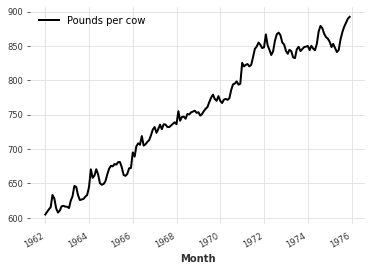

In [ ]:
data3.plot()

In [ ]:
data4, data5 = extract_trend_and_seasonality(data, freq=12, model=ModelMode.MULTIPLICATIVE, method='naive')

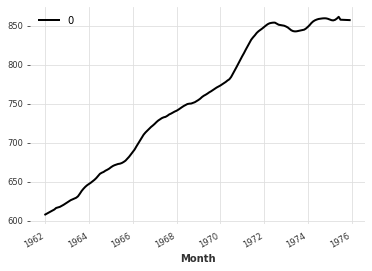

In [ ]:
data4.plot() #trend

In [ ]:
b = stationarity_tests(data4, 0.05, 0.05)
print(b)

False


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
data6 = remove_trend(data, model=ModelMode.MULTIPLICATIVE, method='naive')
b = stationarity_tests(data6, 0.05, 0.05)
print(b)

True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


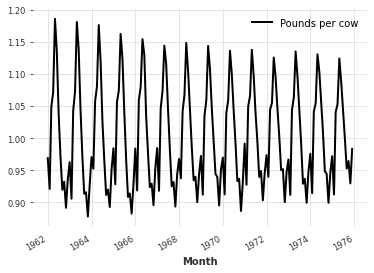

In [ ]:
data6.plot()

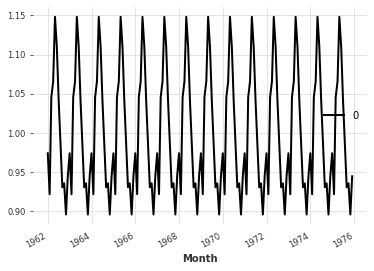

In [ ]:
data5.plot() #seasonal

In [ ]:
b = stationarity_tests(data5, 0.05, 0.05)
print(b)

True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


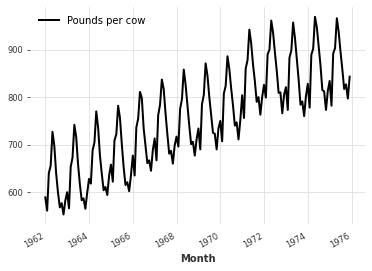

In [ ]:
data.plot()

In [ ]:
b = stationarity_tests(data, 0.05, 0.05)
print(b)

False


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
